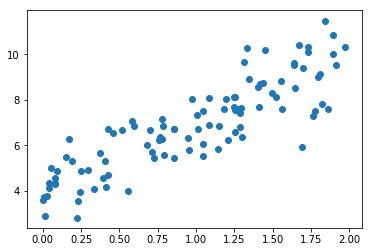

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Etape 1: generer les datas: 

x=2 * np.random.rand(100,1)
y=4 + 3 * x + np.random.randn(100,1)

plt.scatter(x,y)

# Generation d'Inputs

In [2]:
# Construction de la variable X en concatenant 1 
X_b=np.c_[np.ones((100,1)), x]
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=I_2

# Methode de Gradient descendant stochastique

Quand la fonction de cout est irreguliere, admet des minimas locaux (pas convexe), on utilise cette methode.
On calcule le gradient uniquement pour une seule observation pour chaque etape. l'inconvenient de la methode est que la solution finale n'est pas optimale mais bonne et pour le resoudre on reduit progressivement le taux d'apprentissage via une Echeancier ou learning schedule.La methode se base sur la methode du recuit simule

### Algo analytique:

In [21]:
# Code: 
n_epochs=50
t0,t1=5, 50 # Hyperparameter du L.Sch
m=100

def learning_schedule(t):
    return t0/(t+t1)

thetas=np.random.randn(2,1) #initialisation aleatoire
thetas_path=[thetas]
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)
        learning_rate = learning_schedule(epoch * m + 1 ) # taux d'apprentissage(m) se reduit progressivement
        thetas = thetas - learning_rate * gradients
        
thetas

array([[ 4.07113965],
       [ 2.93304422]])

### Scikit learn:

In [20]:
# le Regressor dans ce cas est: SGDRegressor:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,tol=0.00001,penalty=None,eta0=0.1) 
# n_epochs, aucune penalty contraintes, eta0 pour init.
sgd_reg.fit(x,y.ravel()) # y s'attend a une list (1! dim) pas vecteur
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.90613676]), array([ 2.92580398]))